# load dataset

In [24]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

In [25]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
y.value_counts()

class          
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# AutoML

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
# chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [29]:
# cấu hình tự động tìm kiếm siêu tham số mô hình
parameters = {'n_estimators':[3, 5, 7, 9], 'max_depth':[2, 5, 4, 6, 8]}
rfcls = RandomForestClassifier()
gridcv_clf = GridSearchCV(rfcls, parameters, cv=5)

In [30]:
# viet pipeline dự án 
pipe = Pipeline([
    ('pca', PCA(n_components=2)), # trích xuất đặc trưng
    ('scaler', StandardScaler()), # tiền xử lý
    ('gridcv', gridcv_clf) # tìm kiếm tham số 
    ])

In [31]:
# huấn luyện mô hình
pipe.fit(X_train, y_train.values.reshape(-1))

Pipeline(steps=[('pca', PCA(n_components=2)), ('scaler', StandardScaler()),
                ('gridcv',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'max_depth': [2, 5, 4, 6, 8],
                                          'n_estimators': [3, 5, 7, 9]}))])

In [32]:
# Kết quả
pipe.score(X_test, y_test.values.reshape(-1))

1.0

In [33]:
# dự đoán kết quả
y_pred = pipe.predict(X_test)

In [38]:
# bảng thống kê kết quả
print(classification_report(y_test, y_pred, target_names=np.unique(y_test.values.reshape(-1))))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



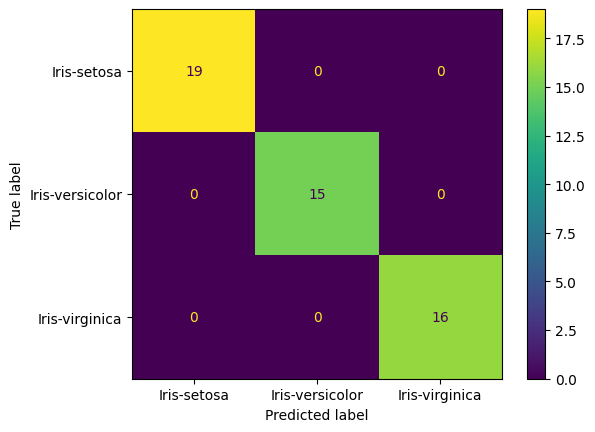

In [40]:
# ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test.values.reshape(-1)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test.values.reshape(-1)))
disp.plot()
plt.show()